# Лабораторна робота 3
### Студента групи МІТ-31 (підгрупа 1)
### Байди Данила Андрійовича
## Завдання
1. Створити набір даних за допомогою DatasetGenerator
2. Завантажити набір даних для регресії на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)
3. (опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації на основі звичайних можливостей Python.
4. Для отриманих наборів даних провести встановленні кроки моделювання.
5. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drinking_water_potability.csv')

In [3]:
df = df.replace(np.nan, 0)

In [4]:
df = df.astype({"Turbidity": "int64"})

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2,0
1,3.716080,129.422921,18630.05786,6.635246,0.000000,592.885359,15.180013,56.329076,4,0
2,8.099124,224.236259,19909.54173,9.275884,0.000000,418.606213,16.868637,66.420093,3,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4,0


In [6]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4,1
3272,7.808856,193.553212,17329.80216,8.061362,0.000000,392.449580,19.903225,0.000000,2,1
3273,9.419510,175.762646,33155.57822,7.350233,0.000000,432.044783,11.039070,69.845400,3,1
3274,5.126763,230.603758,11983.86938,6.303357,0.000000,402.883113,11.168946,77.488213,4,1
3275,7.874671,195.102299,17404.17706,7.509306,0.000000,327.459761,16.140368,78.698446,2,1


# Classes in size

In [7]:
print("Turbidity")
print(df['Turbidity'].unique())

Turbidity
[2 4 3 5 6 1]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   int64  
 9   Potability       3276 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 256.1 KB


In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,6.019540,196.369496,22014.092526,7.122277,254.203468,426.205111,14.284970,63.112960,3.461844,0.390110
std,2.924207,32.879761,8768.570828,1.583085,146.765192,80.824064,3.308162,21.353531,0.839526,0.487849
min,0.000000,47.432000,320.942611,0.352000,0.000000,181.483754,2.200000,0.000000,1.000000,0.000000
25%,5.283146,176.850538,15666.690300,6.127421,240.722848,365.734414,12.065801,53.793688,3.000000,0.000000
50%,6.735249,196.967627,20927.833605,7.130299,318.660382,421.884968,14.218338,65.445962,3.000000,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.000000,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.000000,1.000000


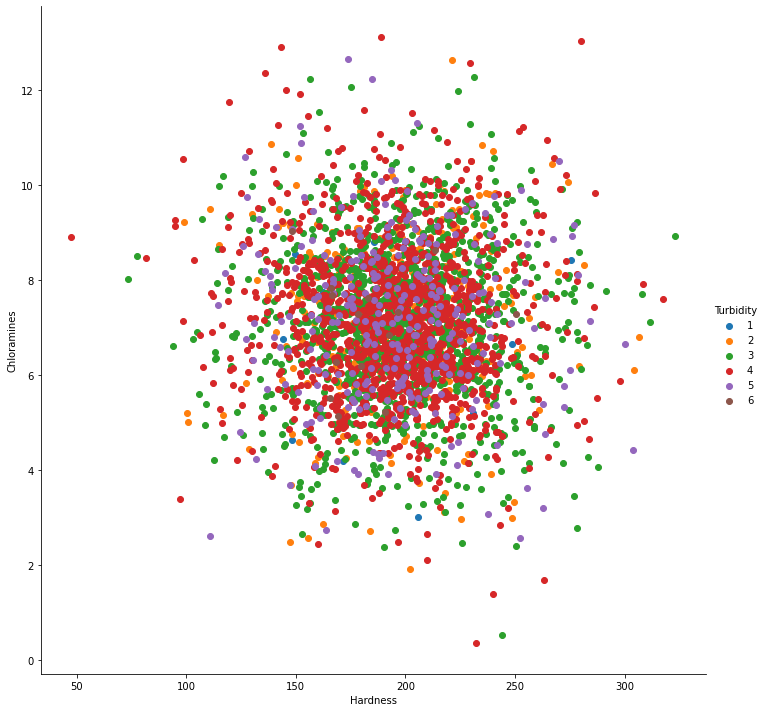

In [10]:
sns.FacetGrid(df, hue="Turbidity", height=10) \
   .map(plt.scatter, "Hardness", "Chloramines") \
   .add_legend()

plt.show()

In [30]:
features = list(df.columns[1:6])            	
target = df.columns[8]                     

print('Features:',features)
print('Target:',target)

# store feature matrix in "X"
X = df.iloc[:,1:6]                         

# store response vector in "y"
y = df.iloc[:,8]                           


print(y.shape)
print(X.shape)

Features: ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity']
Target: Turbidity
(3276,)
(3276, 5)


In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)


df['Encodedsize'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
df.tail(10)

Classes: [1 2 3 4 5 6]
Response variable after encoding: [1 3 2 ... 2 3 1]


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Encodedsize
3266,8.372910,169.087052,14622.74549,7.547984,0.000000,464.525552,11.083027,38.435151,4,1,3
3267,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4,1,3
3268,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3,1,2
3269,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4,1,3
3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3,1,2
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4,1,3
3272,7.808856,193.553212,17329.80216,8.061362,0.000000,392.449580,19.903225,0.000000,2,1,1
3273,9.419510,175.762646,33155.57822,7.350233,0.000000,432.044783,11.039070,69.845400,3,1,2
3274,5.126763,230.603758,11983.86938,6.303357,0.000000,402.883113,11.168946,77.488213,4,1,3
3275,7.874671,195.102299,17404.17706,7.509306,0.000000,327.459761,16.140368,78.698446,2,1,1


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [33]:
value = knn.predict([[3, 5, 4, 2, 1]])
print('prediction value:',value)

print('Predicted Class', df.loc[df['Encodedsize'] == 2, 'Turbidity'].values[0])

prediction value: [2]
Predicted Class 3


In [34]:
X_new = [[3, 5, 4, 2, 1], [5, 4, 3, 2, 1]]                       
knn.predict(X_new)

array([2, 2], dtype=int64)

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
print(knn.predict(X_new))

kypred = knn.predict(X)

[2 2]


# How to check the best value for K?

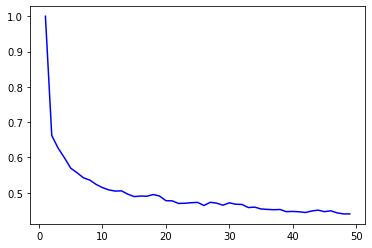

In [36]:
from sklearn import metrics
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Blue',)
plt.show()

In [37]:
from sklearn import metrics
print(metrics.accuracy_score(y, kypred))

0.5692918192918193


# Evaluation procedure: Train/test split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [39]:
print(X_train.shape)
print(y_train.shape)

(1965, 5)
(1965,)


# KNN with Train Test

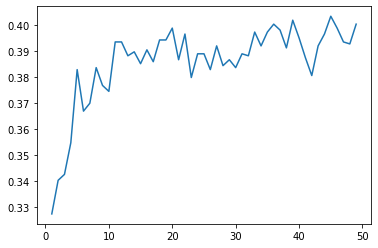

In [40]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.39359267734553777